In [1]:
from extractor_check import image_paths, model

In [53]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import random

from torchvision import transforms

In [3]:
print(len(image_paths))

221855


In [4]:
classes = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
print('classes: {}'.format(len(classes)))

classes: 91


In [5]:
def compute_image(paths, index):
    image_pil = Image.open(paths[index]).resize((224, 224))
    image_tensor = transforms.ToTensor()(image_pil).cuda()
    output = model([image_tensor])
    return image_tensor, output

In [64]:
def render_image(image, boxes, labels, scores, max_num_boxes, min_score):
    length = len(boxes) if len(boxes) <= max_num_boxes else max_num_boxes
    index = [i for i in range(length)]
    boxes = boxes[index].detach().numpy()
    labels = labels[index].detach().numpy()
    scores = scores[index].detach().numpy()
    labels = np.array(list(map(lambda index: classes[index], labels)))
    
    # Filter with score
    index = []
    for i, score in enumerate(scores):
        if score < min_score:
            break
        else:
            index.append(i)
    boxes = boxes[index]
    labels = labels[index]
    scores = scores[index]
    
    def gen_color_scheme(labels):
        scheme = {}
        for label in labels:
            if not label in scheme.keys():
                scheme[label] = (random.randint(0,255),random.randint(0,255),random.randint(0,255))
        return scheme
    
    scheme = gen_color_scheme(labels)
    
    for box, label in zip(boxes,labels):
        x1, y1, x2, y2 = box
        cv2.rectangle(image, (x1, y1), (x2, y2), scheme[label], 1)
    
    print(labels)
    print(scores)
    return image

index:  10


['person' 'person' 'person' 'person' 'tv']
[0.9967032 0.9877658 0.9849819 0.9068754 0.8146552]


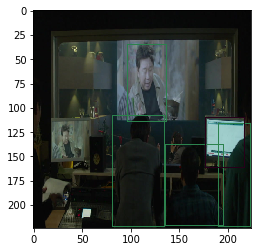

index:  100


['person' 'person' 'tie']
[0.99541664 0.9921449  0.9746097 ]


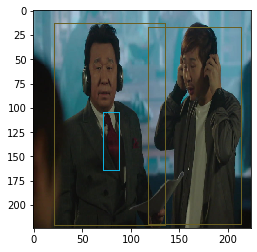

index:  1500


['person' 'person']
[0.99885833 0.9646568 ]


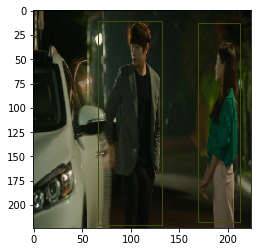

index:  2000


['person']
[0.9978125]


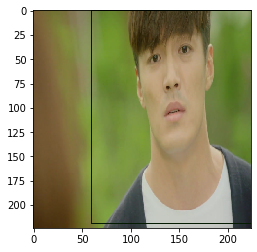

index:  2500


['person']
[0.9984303]


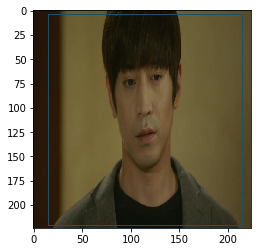

index:  3000


['person' 'chair']
[0.95836556 0.86626834]


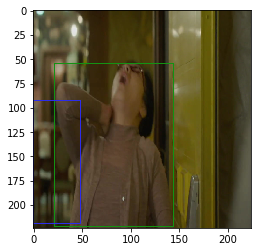

index:  3010


['person']
[0.99701333]


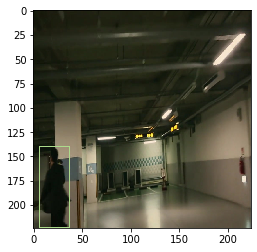

index:  3015


['person']
[0.99548316]


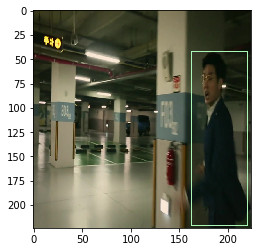

index:  3018


['person' 'person']
[0.99655956 0.9883209 ]


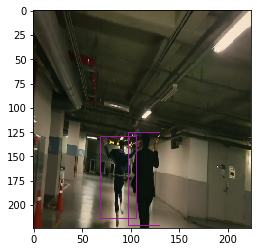

index:  3019


[]
[]


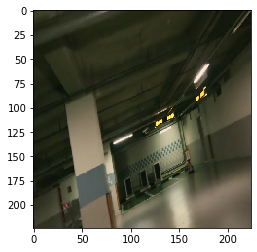

index:  3020


['person' 'person']
[0.9980773 0.9763914]


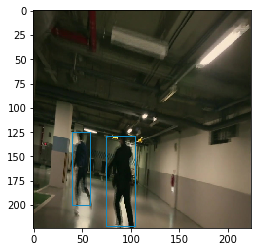

index:  3021


['person' 'traffic light' 'person' 'traffic light']
[0.9978097  0.8584328  0.80255175 0.73169583]


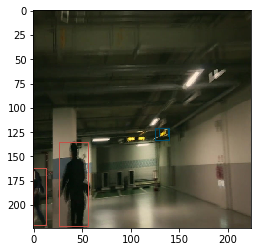

index:  3022


['person']
[0.9957028]


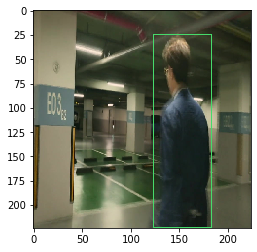

In [ ]:
max_num_boxes = 5
min_score = 0.7

while True:
    index = int(input('index: '))
    if index == -1:
        break
    image_tensor, output = compute_image(image_paths, index)
    image_pil = transforms.ToPILImage()(image_tensor.cpu())
    output = output[0]
    
    rendered_npy = render_image(np.array(image_pil), output['boxes'].cpu(), output['labels'].cpu(), output['scores'].cpu(), max_num_boxes, min_score)
    plt.imshow(rendered_npy)
    plt.show()